In [1]:
import pandas as pd
import numpy as np
import tifffile as tiff

import re

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

import tractometrics as tm

/usr/local/lib/python3.5/dist-packages/tifffile/tifffile.py:306: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "


# vector plotting function

In [2]:
def plotv(M):
    rows,cols = M.T.shape
#     print(rows,cols)

    #Get absolute maxes for axis ranges to center origin
    #This is optional
    maxes = 1.1*np.amax(abs(M), axis = 0)
    colors = ['b','r','k']
    fig = plt.figure()
    fig.suptitle('Vectors', fontsize=10, fontweight='bold')

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_title('Vector operations')

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    for i,l in enumerate(range(0,cols)):
        # print(i)
        plt.axes().arrow(0,0,M[i,0],M[i,1],head_width=0.2,head_length=0.1,zorder=3)

        ax.text(M[i,0],M[i,1], str(M[i]), style='italic',
            bbox={'facecolor':'red', 'alpha':0.5, 'pad':0.5})

    plt.plot(0,0,'ok') #<-- plot a black point at the origin
    # plt.axis('equal')  #<-- set the axes to the same scale
    plt.xlim([-maxes[0],maxes[0]]) #<-- set the x axis limits
    plt.ylim([-maxes[1],maxes[1]]) #<-- set the y axis limits

    plt.grid(b=True, which='major') #<-- plot grid lines
    plt.show()

# Segment Length Computation

In [3]:
segment = np.array([[0, 0, 0], [0, 1, 0]])
vector = segment[1] - segment[0]

print('expected length: 1')
print('calculated lengthed:', np.linalg.norm(segment[0] - segment[1]))

expected length: 1
calculated lengthed: 1.0


In [4]:
# 30 60 90 triangle hypotenuse
segment = np.array([[0, 0, 0], [1, np.sqrt(3), 0]])
vector = segment[1] - segment[0]

print('expected length: 2')
print('calculated lengthed:', np.linalg.norm(segment[0] - segment[1]))

expected length: 2
calculated lengthed: 2.0


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


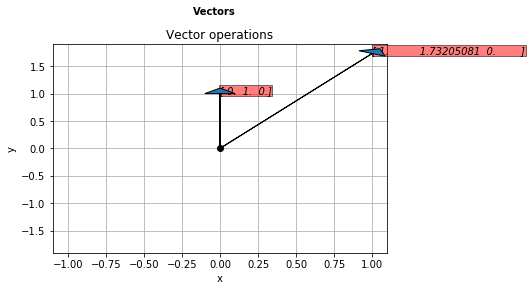

In [5]:
plotv(np.array([[1, np.sqrt(3), 0], [0, 1, 0]]))

# Testing Angle Computation

expected angle: 1.57079632679 rad or 90 deg
calculated angle: 90.0 deg


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


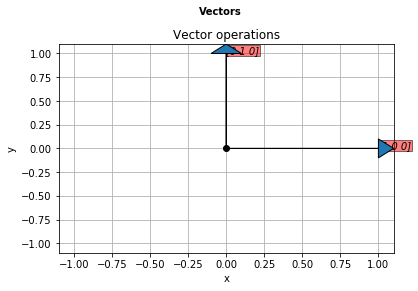

In [6]:
a, b = [1, 0, 0], [0, 1, 0]

print('expected angle: 1.57079632679 rad or 90 deg')
print('calculated angle:', (tm.angle_between(a, b) / np.pi) * 180, 'deg')

plotv(np.array([[1, 0, 0], [0, 1, 0]]))

expected angle: 60 deg
calculated angle: 60.0 deg


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


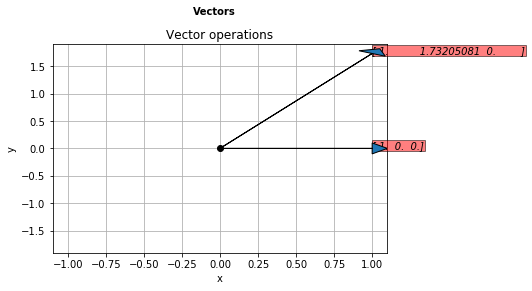

In [7]:
# 30 60 90 triangle
a, b = [1, 0, 0], [1, np.sqrt(3), 0]

print('expected angle: 60 deg')
print('calculated angle:', (tm.angle_between(a, b) / np.pi) * 180, 'deg')

plotv(np.array([[1, 0, 0], [1, np.sqrt(3), 0]]))

expected angle: 120 deg
calculated angle: 120.0 deg


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


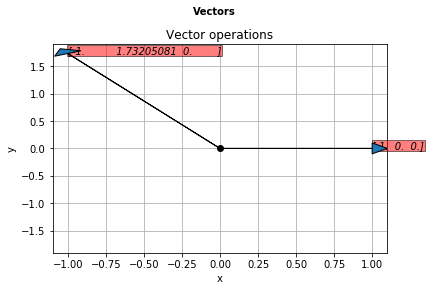

In [8]:
a, b = [1, 0, 0], [-1, np.sqrt(3), 0]

print('expected angle: 120 deg')
print('calculated angle:', (tm.angle_between(a, b) / np.pi) * 180, 'deg')

plotv(np.array([[1, 0, 0], [-1, np.sqrt(3), 0]]))

# Parsing Tractography algorithm output

In [9]:
file = open("test_4_output.csv", 'r')
first = True
# for i, line in enumerate(file.readlines()):
lines = file.readlines()

curves = []
curve = []

last_curve_index = 1
for line in lines:
    coords = list(map(int, line.split(' ')))
#     print(coords)
    if coords[3] != last_curve_index:
        curves.append(np.array(curve))
        curve = []
        
    curve.append(np.array(coords[:-1]))
    last_curve_index = coords[-1]

curves = np.array(curves)

In [10]:
print(curves)

[array([[  0, 211,  19],
       [  1, 211,  19],
       [  2, 211,  19]])
 array([[  1, 467,   1],
       [  1, 468,   1],
       [  1, 469,   1],
       [  1, 470,   1],
       [  1, 471,   1],
       [  2, 472,   1],
       [  2, 473,   1],
       [  3, 474,   1],
       [  3, 475,   1],
       [  4, 476,   1],
       [  5, 477,   1],
       [  5, 478,   1],
       [  5, 479,   1],
       [  5, 480,   1],
       [  5, 481,   1],
       [  5, 482,   1],
       [  6, 483,   1],
       [  6, 484,   1],
       [  6, 485,   1],
       [  6, 486,   1],
       [  6, 487,   1],
       [  6, 488,   1],
       [  7, 489,   1],
       [  7, 490,   1],
       [  8, 491,   1],
       [  9, 492,   1],
       [ 10, 493,   1],
       [ 11, 493,   1],
       [ 12, 494,   1],
       [ 13, 494,   1],
       [ 14, 494,   1],
       [ 15, 493,   1],
       [ 15, 495,   1],
       [ 16, 493,   1],
       [ 16, 496,   1],
       [ 17, 492,   1],
       [ 17, 496,   1],
       [ 18, 491,   1],
       [ 18, 

# Evaluation Metrics

## Getting Segments

In [11]:
segments, angles = tm.compute_features(curves)
print(len(segments))

1804


## Creating feature vector

### Computing Segment Lengths

length histogram


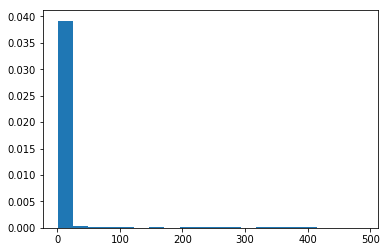

[  9.52882483e-01   1.05321508e-02   2.77161863e-03   3.88026608e-03
   2.77161863e-03   0.00000000e+00   2.77161863e-03   5.54323725e-04
   3.32594235e-03   3.32594235e-03   1.66297118e-03   3.32594235e-03
   5.54323725e-04   2.77161863e-03   1.66297118e-03   3.32594235e-03
   1.66297118e-03   5.54323725e-04   5.54323725e-04   1.10864745e-03]
1.0


In [12]:
length_vector = tm.compute_length_vector(segments, show_histogram=True)
print(length_vector)
print(sum(length_vector))

### Angles

angle histogram


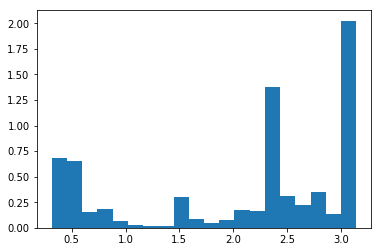

20
sum: 1.0
[ 0.09650582  0.09262341  0.02163062  0.02606767  0.00998336  0.00443705
  0.00277316  0.00277316  0.04215197  0.01164725  0.00665557  0.01053799
  0.02440377  0.02273988  0.19523017  0.04381586  0.03161398  0.04936217
  0.01885746  0.28618968]


In [13]:
angle_vector = tm.compute_angle_vector(angles, show_histogram=True)
print(len(angle_vector))
print('sum:', sum(angle_vector))
print(angle_vector)

range: (angle_threshold, np.pi)

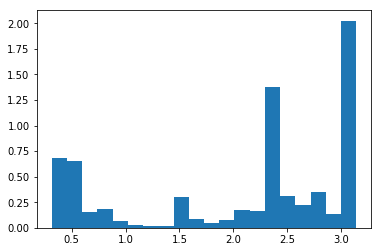

In [14]:
seg_angles = np.array([angle for angle in angles if angle > (np.pi/10)])
hist, bins, patches = plt.hist(seg_angles, range=(np.pi/10, np.pi), density=True, bins=20)

range: (angle_threshold, np.pi/3)

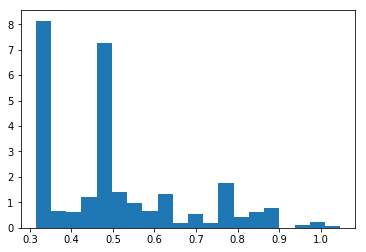

In [15]:
seg_angles = np.array([angle for angle in angles if angle > (np.pi/10)])
hist, bins, patches = plt.hist(seg_angles, range=(np.pi/10, np.pi/3), density=True, bins=20)

range: auto

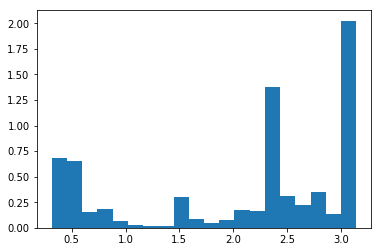

In [16]:
seg_angles = np.array([angle for angle in angles if angle > (np.pi/10)])
hist, bins, patches = plt.hist(seg_angles, density=True, bins=20)

In [18]:
print(len(angles))
print(max(angles))
# print(angle_threshold)

2296
3.14159265359


# Putting it all together

length histogram


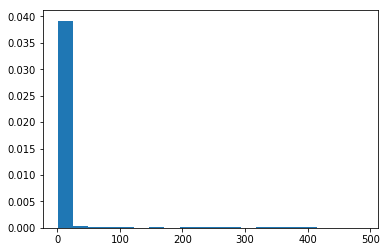

angle histogram


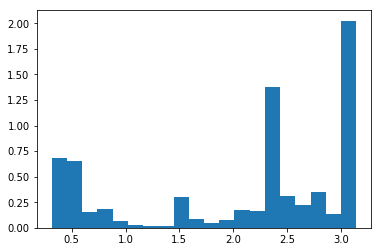

[  9.52882483e-01   1.05321508e-02   2.77161863e-03   3.88026608e-03
   2.77161863e-03   0.00000000e+00   2.77161863e-03   5.54323725e-04
   3.32594235e-03   3.32594235e-03   1.66297118e-03   3.32594235e-03
   5.54323725e-04   2.77161863e-03   1.66297118e-03   3.32594235e-03
   1.66297118e-03   5.54323725e-04   5.54323725e-04   1.10864745e-03
   9.65058236e-02   9.26234054e-02   2.16306156e-02   2.60676650e-02
   9.98336106e-03   4.43704936e-03   2.77315585e-03   2.77315585e-03
   4.21519689e-02   1.16472546e-02   6.65557404e-03   1.05379922e-02
   2.44037715e-02   2.27398780e-02   1.95230172e-01   4.38158625e-02
   3.16139767e-02   4.93621742e-02   1.88574598e-02   2.86189684e-01]


In [19]:
pred_fv = tm.compute_feature_vector(curves, show_histogram=True)
print(pred_fv)

# Testing on Annotations

### Getting curves

In [20]:
# reading in annotations file
ann = pd.read_csv('tractography_4.swc', header=None, delim_whitespace=True, skiprows=3)
ann_points = ann[[2,3,4,6]]
ann_points.columns = ['x', 'y', 'z', 'i']
# print(ann_points)

# computing curves
ann_curves = []
curve = []

for index, row in ann_points.iterrows():
    if row['i'] == -1 and index != 0:
        ann_curves.append(np.array(curve))
        curve = []
    curve.append(np.array([row['x'], row['y'], row['z']]))
    
ann_curves = np.array(ann_curves)
# print(curves)

length histogram


/work/bloby/neugen/tractometrics.py:14: RuntimeWarning: invalid value encountered in true_divide
  return vector / np.linalg.norm(vector)


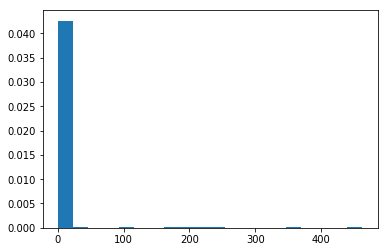

angle histogram


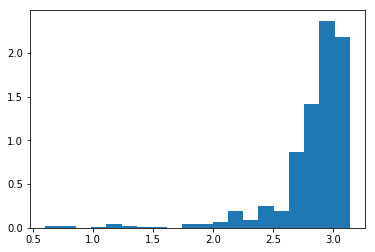

In [21]:
ann_fv = tm.compute_feature_vector(ann_curves, show_histogram=True)

In [22]:
print(ann_fv)

[ 0.98349835  0.00165017  0.          0.          0.00165017  0.          0.
  0.00165017  0.00165017  0.00165017  0.00165017  0.          0.          0.
  0.          0.00330033  0.          0.          0.          0.00330033
  0.          0.          0.00330579  0.00330579  0.00165289  0.
  0.00826446  0.00165289  0.00165289  0.          0.00495868  0.00495868
  0.00826446  0.02809917  0.01818182  0.03636364  0.0677686   0.19008264
  0.29752066  0.32396694]


### Differences

In [23]:
print(pred_fv)

[  9.52882483e-01   1.05321508e-02   2.77161863e-03   3.88026608e-03
   2.77161863e-03   0.00000000e+00   2.77161863e-03   5.54323725e-04
   3.32594235e-03   3.32594235e-03   1.66297118e-03   3.32594235e-03
   5.54323725e-04   2.77161863e-03   1.66297118e-03   3.32594235e-03
   1.66297118e-03   5.54323725e-04   5.54323725e-04   1.10864745e-03
   9.65058236e-02   9.26234054e-02   2.16306156e-02   2.60676650e-02
   9.98336106e-03   4.43704936e-03   2.77315585e-03   2.77315585e-03
   4.21519689e-02   1.16472546e-02   6.65557404e-03   1.05379922e-02
   2.44037715e-02   2.27398780e-02   1.95230172e-01   4.38158625e-02
   3.16139767e-02   4.93621742e-02   1.88574598e-02   2.86189684e-01]


# Segment Length vector difference

In [24]:
print(np.linalg.norm(pred_fv[:10] - ann_fv[:10]))

0.0324763935886


# Angle vector difference

In [25]:
print(np.linalg.norm(pred_fv[10:] - ann_fv[10:]))

0.390624206859


# Total difference

In [26]:
print(np.linalg.norm(pred_fv - ann_fv))

0.391971921348


length histogram


/work/bloby/neugen/tractometrics.py:14: RuntimeWarning: invalid value encountered in true_divide
  return vector / np.linalg.norm(vector)


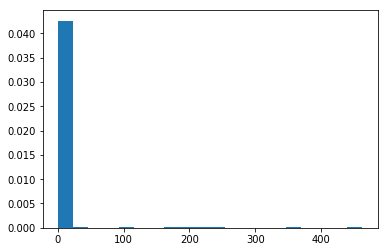

angle histogram


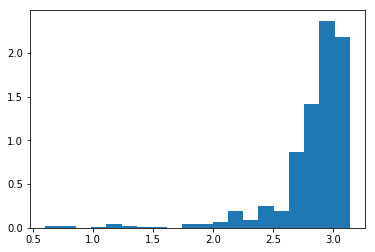

In [27]:
_ = tm.compute_feature_vector(ann_curves, show_histogram=True)

length histogram


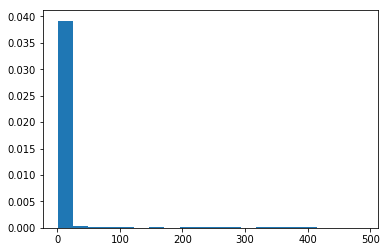

angle histogram


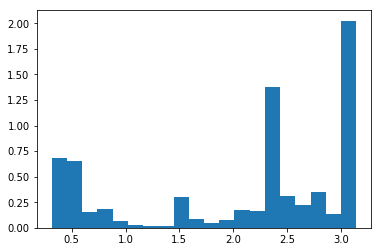

In [28]:
_ = tm.compute_feature_vector(curves, show_histogram=True)